# Course Name: **AI Mastery Bootcamp: AI Algorithms, DeepSeek AI, AI Agents**

# Section 10: Week 10: **Convolutional Neural Networks (CNNs)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# Define transformation with data augmentation
transform_train= transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 Data
train_dataset= datasets.CIFAR10(root= "/.data", train=True, download=True, transform=transform_train)
test_dataset= datasets.CIFAR10(root= "/.data", train=False, download=True, transform=transform_test)

train_loader= DataLoader(train_dataset, batch_size= 64, shuffle= True)
test_loader= DataLoader(test_dataset, batch_size= 64, shuffle= False)

print(f"Train Data Size: {len(train_loader)}")
print(f"Test Data Size: {len(test_loader)}")



100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


Extracting /.data/cifar-10-python.tar.gz to /.data
Files already downloaded and verified
Train Data Size: 782
Test Data Size: 157


In [3]:
class EnhancedCNN(nn.Module):

    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        # Calculate the size of the output from the convolutional layers dynamically
        self._calculate_conv_output()

        self.fc1 = nn.Linear(self.conv_output_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def _calculate_conv_output(self):
        # Dummy input tensor with the same size as the input images
        dummy_input = torch.zeros(1, 3, 32, 32)
        with torch.no_grad():
            output = self.pool(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(dummy_input)))))))
        self.conv_output_size = output.numel()

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = EnhancedCNN()
print(model)



EnhancedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2304, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Epoch 1, Loss: 1.2138
Epoch 2, Loss: 1.2074
Epoch 3, Loss: 1.2022
Epoch 4, Loss: 1.1983
Epoch 5, Loss: 1.1879
Epoch 6, Loss: 1.1894
Epoch 7, Loss: 1.1790
Epoch 8, Loss: 1.1776
Epoch 9, Loss: 1.1773
Epoch 10, Loss: 1.1731
Epoch 11, Loss: 1.1753
Epoch 12, Loss: 1.1687
Epoch 13, Loss: 1.1705
Epoch 14, Loss: 1.1630
Epoch 15, Loss: 1.1659
Epoch 16, Loss: 1.1595
Epoch 17, Loss: 1.1615
Epoch 18, Loss: 1.1607
Epoch 19, Loss: 1.1529
Epoch 20, Loss: 1.1551
Test Accuracy: 63.64%


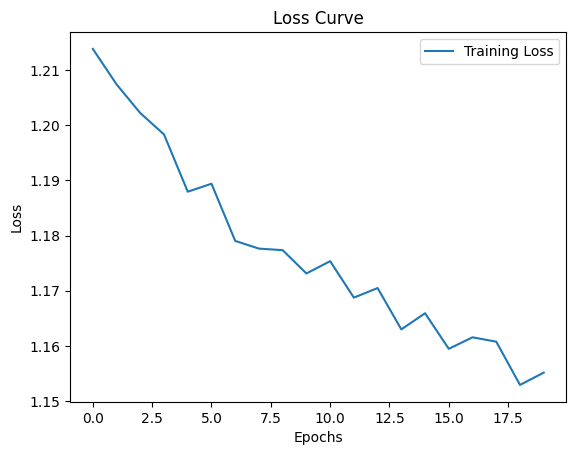

CPU times: user 14min 44s, sys: 1.84 s, total: 14min 46s
Wall time: 14min 51s


In [5]:
%%time
# Define loss function and optimizers

criterion= nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr= 0.001)

training_loss= []

# Training Loop
def train_model(model, train_loader, criterion, optimizer, epochs= 20):
  model.train()

  for epoch in range(epochs):
    running_loss= 0.0
    for images, labels in train_loader:
      optimizer.zero_grad()
      outputs= model(images)
      loss= criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    epoch_loss= running_loss/ len(train_loader)
    training_loss.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

train_model(model, train_loader, criterion, optimizer, epochs= 20)

# Evaluation Loop
def evaluation_model(model, test_loader):
  model.eval()
  correct= 0
  total= 0
  with torch.no_grad():
    for images, labels in test_loader:
      outputs= model(images)
      _, predicted= torch.max(outputs, 1)
      total += labels.size(0)
      correct+=  (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 *correct /  total:.2f}%")

evaluation_model(model, test_loader)

plt.plot(training_loss, label= "Training Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

----
>
>
----